<a href="https://colab.research.google.com/github/Raymay3/MAT422/blob/main/HW%202.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4.1. Maximum Likelihood Estimation (MLE) for Random Samples**

***I. Understanding Maximum Likelihood Estimation (MLE)***

**Maximum Likelihood Estimation (MLE)** is a method used to estimate the parameters of a statistical model. The core idea is to find the parameter values that maximize the likelihood function, which measures how likely it is to observe the given sample data under different parameter values.

**Key Concepts:**

- *Likelihood Function*: Given a set of observations, the likelihood function ($L(\theta$)) represents the probability of observing the data as a function of the parameter ($theta$).

  \
  \begin{aligned}
  L(\theta) = f(x_1, x_2, \ldots, x_n; \theta)
  \end{aligned}

  \
  where ($f$) is the joint probability mass function (pmf) or probability density function (pdf) of the data.

- *Maximum Likelihood Estimate (MLE)*: The parameter value ($\hat{\theta}$) that maximizes the likelihood function.

  \
  \begin{aligned}
  \hat{\theta} = \arg\max_{\theta} L(\theta)
  \end{aligned}

  \
- *Log-Likelihood*: Often, it is more convenient to work with the natural logarithm of the likelihood function, known as the log-likelihood, due to its mathematical properties.

  \
  \begin{aligned}
  \ell(\theta) = \ln L(\theta)
  \end{aligned}

  \
***Why MLE?***

- *Consistency*: As the sample size increases, MLE converges to the true parameter value.
- *Efficiency*: Under certain conditions, MLE achieves the lowest possible variance among unbiased estimators.
- *Flexibility*: MLE can be applied to a wide range of probability distributions and models.

---

***II. MLE for Normal Distribution Parameters (μ and σ²)***

Let's consider the case where we have a random sample from a **Normal Distribution**. We aim to estimate the parameters ($\mu$) (mean) and ($\sigma^2$) (variance) using MLE.

**Theoretical Derivation:**

Given a sample ($X_1, X_2, \ldots, X_n$) from a normal distribution ($\mathcal{N}(\mu, \sigma^2)$), the likelihood function is:

\
\begin{aligned}
L(\mu, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(X_i - \mu)^2}{2\sigma^2}\right)
\end{aligned}

\
Taking the natural logarithm, the log-likelihood function becomes:

\
\begin{aligned}
\ell(\mu, \sigma^2) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2
\end{aligned}

\
To find the MLE estimates, we take partial derivatives with respect to ($\mu$) and ($\sigma^2$), set them to zero, and solve:

1. **For ($\mu$)**:

\
\begin{aligned}
\frac{\partial \ell}{\partial \mu} = \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu) = 0 \implies \hat{\mu} = \bar{X}
\end{aligned}

\
2. **For ($\sigma^2$)**:

\
\begin{aligned}
\frac{\partial \ell}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (X_i - \mu)^2 = 0 \implies \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (X_i - \hat{\mu})^2
\end{aligned}

\
Thus, the MLEs for ($\mu$) and ($\sigma^2$) are the sample mean and the sample variance (with denominator ($n$)) respectively.

True μ: 50, MLE μ̂: 50.1933
True σ²: 100, MLE σ̂²: 95.7905
True σ: 10, MLE σ̂: 9.7873
Sample Mean: 50.1933
Sample Variance (MLE): 95.7905


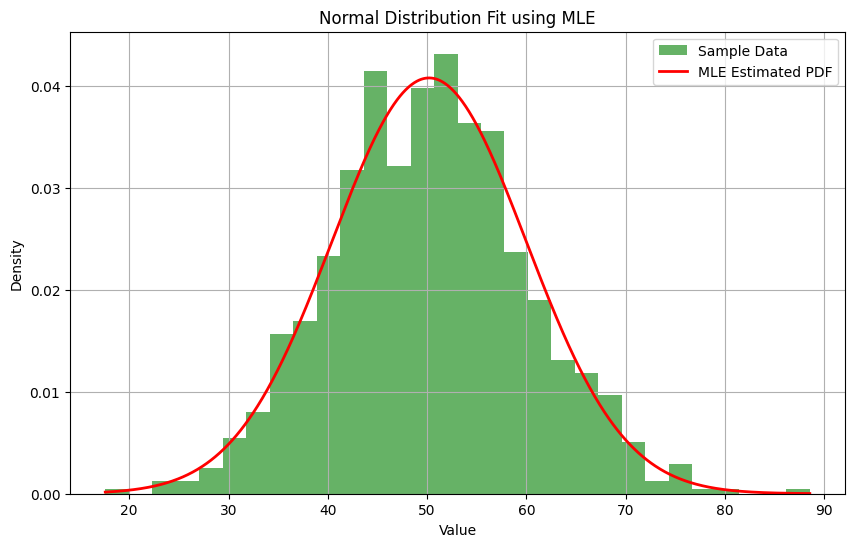

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample from a normal distribution
true_mu = 50
true_sigma = 10
n = 1000
sample = np.random.normal(true_mu, true_sigma, n)

# Define the negative log-likelihood function for normal distribution
def neg_log_likelihood(params, data):
    mu, sigma_sq = params
    if sigma_sq <= 0:
        return np.inf
    n = len(data)
    return (n/2)*np.log(2*np.pi*sigma_sq) + (1/(2*sigma_sq)) * np.sum((data - mu)**2)

# Initial guesses for mu and sigma_sq
initial_guess = [np.mean(sample), np.var(sample)]

# Perform the optimization to find MLE estimates
result = minimize(neg_log_likelihood, initial_guess, args=(sample,), bounds=[(None, None), (1e-6, None)])

# Extract MLE estimates
mle_mu, mle_sigma_sq = result.x
mle_sigma = np.sqrt(mle_sigma_sq)

print(f"True μ: {true_mu}, MLE μ̂: {mle_mu:.4f}")
print(f"True σ²: {true_sigma**2}, MLE σ̂²: {mle_sigma_sq:.4f}")
print(f"True σ: {true_sigma}, MLE σ̂: {mle_sigma:.4f}")

# Compare with sample mean and variance
sample_mean = np.mean(sample)
sample_variance = np.var(sample, ddof=0)  # ddof=0 for MLE (n denominator)
print(f"Sample Mean: {sample_mean:.4f}")
print(f"Sample Variance (MLE): {sample_variance:.4f}")

# Plot the sample data and estimated distribution
x_values = np.linspace(min(sample), max(sample), 1000)
estimated_pdf = (1/np.sqrt(2*np.pi*mle_sigma_sq)) * np.exp(-((x_values - mle_mu)**2)/(2*mle_sigma_sq))

plt.figure(figsize=(10, 6))
plt.hist(sample, bins=30, density=True, alpha=0.6, color='g', label='Sample Data')
plt.plot(x_values, estimated_pdf, 'r-', lw=2, label='MLE Estimated PDF')
plt.title('Normal Distribution Fit using MLE')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1. *Data Generation*:
   - We generate a random sample of size ($n = 1000$) from a normal distribution with true parameters ($\mu = 50$) and ($\sigma = 10$).

2. *Negative Log-Likelihood Function*:
   - The negative log-likelihood function for the normal distribution is defined. We aim to minimize this function to find the MLE estimates.

3. *Optimization*:
   - Using `scipy.optimize.minimize`, we find the parameter values ($\mu$) and ($\sigma^2$) that minimize the negative log-likelihood.

4. *Results*:
   - The MLE estimates for ($\mu$) and ($\sigma^2$) are printed and compared with the true values and sample statistics.
   
5. *Visualization*:
   - A histogram of the sample data is plotted alongside the MLE estimated PDF to visually assess the fit.

**Interpretation:**

- The MLE estimates ($\hat{\mu}$) and ($\hat{\sigma}^2$) are very close to the true parameter values, demonstrating the effectiveness of MLE.
- The histogram of the sample data aligns closely with the MLE estimated PDF, indicating a good fit.

---

***III. MLE for Bernoulli Distribution Parameter (p)***

While the previous example focused on continuous random variables, MLE can also be applied to discrete distributions. Here, we demonstrate MLE for a **Bernoulli Distribution**.

**Theoretical Derivation:**

For a Bernoulli distribution, the random variable ($X$) takes values 0 (failure) or 1 (success) with probabilities ($1 - p$) and ($p$), respectively.

Given a sample ($X_1, X_2, \ldots, X_n$), the likelihood function is:

\
\begin{aligned}
L(p) = \prod_{i=1}^{n} p^{X_i} (1 - p)^{1 - X_i}
\end{aligned}

\
Taking the natural logarithm:

\
\begin{aligned}
\ell(p) = \sum_{i=1}^{n} \left( X_i \ln p + (1 - X_i) \ln (1 - p) \right)
\end{aligned}

\
To find the MLE, we take the derivative with respect to ($p$), set it to zero, and solve:

\
\begin{aligned}
\frac{d\ell(p)}{dp} = \sum_{i=1}^{n} \left( \frac{X_i}{p} - \frac{1 - X_i}{1 - p} \right) = 0 \implies \hat{p} = \frac{1}{n} \sum_{i=1}^{n} X_i
\end{aligned}

\
Thus, the MLE for ($p$) is the sample mean.

True p: 0.7, MLE p̂: 0.7120
Sample Mean: 0.7120


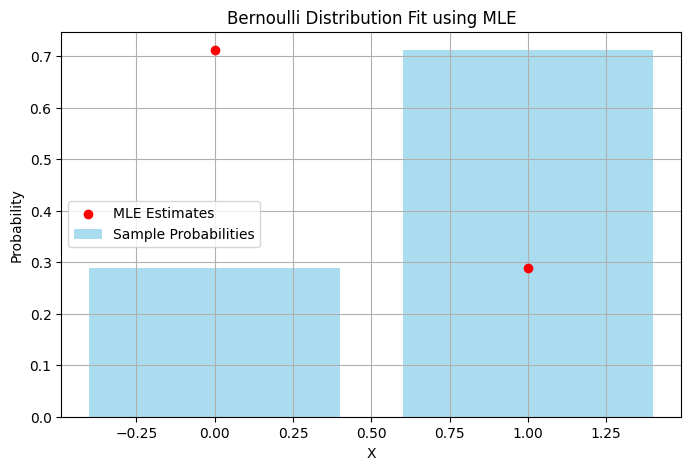

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample from a Bernoulli distribution
true_p = 0.7
n = 1000
sample = np.random.binomial(1, true_p, n)

# Define the negative log-likelihood function for Bernoulli distribution
def neg_log_likelihood_bernoulli(p, data):
    if p <= 0 or p >= 1:
        return np.inf
    return -np.sum(data * np.log(p) + (1 - data) * np.log(1 - p))

# Initial guess for p
initial_guess = [0.5]

# Perform the optimization to find MLE estimate for p
result = minimize(neg_log_likelihood_bernoulli, initial_guess, args=(sample,), bounds=[(1e-6, 1 - 1e-6)])

# Extract MLE estimate
mle_p = result.x[0]

print(f"True p: {true_p}, MLE p̂: {mle_p:.4f}")
print(f"Sample Mean: {np.mean(sample):.4f}")

# Plot the sample data and estimated distribution
counts = np.bincount(sample)
probabilities = counts / n
x_values = [0, 1]
plt.figure(figsize=(8, 5))
plt.bar(x_values, probabilities, color='skyblue', alpha=0.7, label='Sample Probabilities')
plt.scatter(x_values, [mle_p, 1 - mle_p], color='red', zorder=5, label='MLE Estimates')
plt.title('Bernoulli Distribution Fit using MLE')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1. *Data Generation*:
   - We generate a random sample of size ($n = 1000$) from a Bernoulli distribution with true parameter ($p = 0.7$).

2. *Negative Log-Likelihood Function*:
   - The negative log-likelihood function for the Bernoulli distribution is defined. We aim to minimize this function to find the MLE estimate for ($p$).

3. *Optimization*:
   - Using `scipy.optimize.minimize`, we find the parameter value ($p$) that minimizes the negative log-likelihood.

4. *Results*:
   - The MLE estimate ($\hat{p}$) is printed and compared with the true value and the sample mean.

5. *Visualization*:
   - A bar plot of the sample probabilities is shown alongside the MLE estimates for visual assessment.

**Interpretation:**

- The MLE estimate ($\hat{p}$) is very close to the true parameter value ($p = 0.7$), demonstrating the effectiveness of MLE for discrete distributions.
- The sample mean accurately reflects the MLE estimate, as expected for the Bernoulli distribution.

---

***IV. Visualizing the Likelihood Function***

Understanding the shape of the likelihood function can provide insights into the parameter estimates and their uncertainty.

**Example 3: Plotting the Likelihood and Log-Likelihood Functions**

We will plot the likelihood and log-likelihood functions for the Normal distribution to visualize how MLE finds the optimal parameter values.

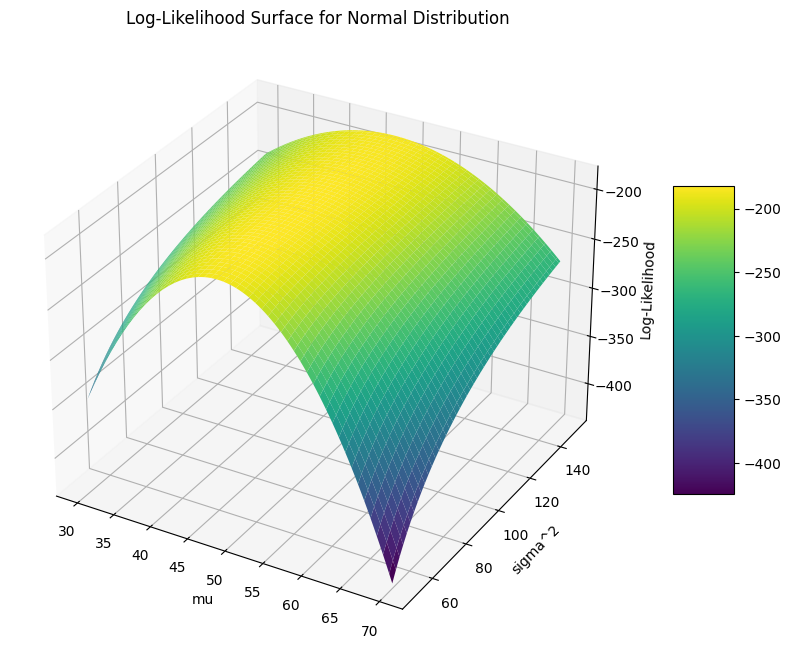

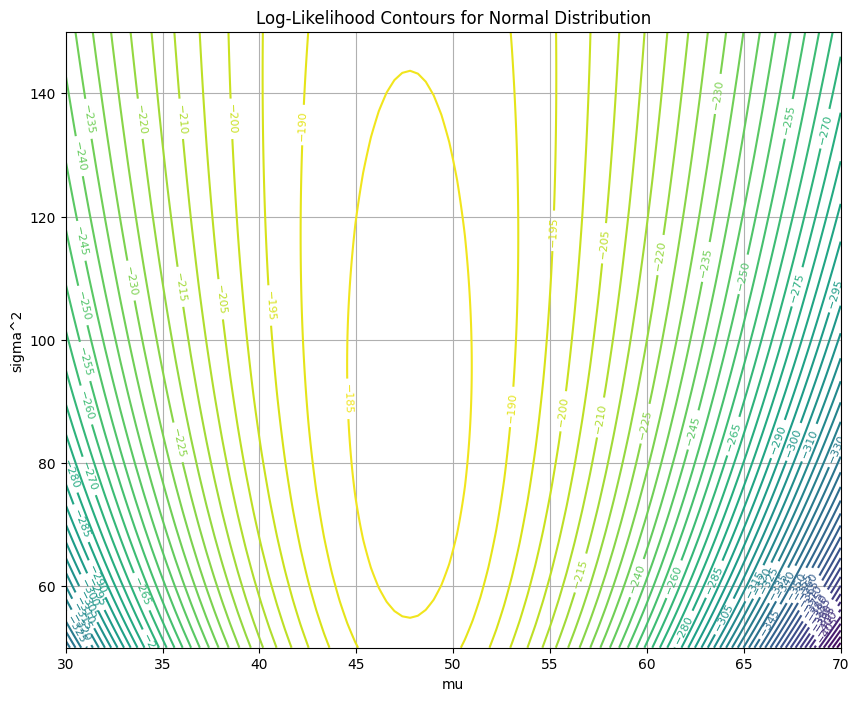

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# Generate a random sample from a normal distribution
true_mu = 50
true_sigma = 10
n = 50
sample = np.random.normal(true_mu, true_sigma, n)

# Define the log-likelihood function for normal distribution
def log_likelihood(params, data):
    mu, sigma_sq = params
    if sigma_sq <= 0:
        return -np.inf
    n = len(data)
    return -n/2 * np.log(2 * np.pi * sigma_sq) - (1 / (2 * sigma_sq)) * np.sum((data - mu)**2)

# Define a grid of mu and sigma_sq values
mu_values = np.linspace(true_mu - 20, true_mu + 20, 100)
sigma_sq_values = np.linspace(50, 150, 100)
mu_grid, sigma_sq_grid = np.meshgrid(mu_values, sigma_sq_values)

# Compute log-likelihood over the grid
log_likelihood_grid = np.array([[log_likelihood([mu, sigma_sq], sample) for mu in mu_values] for sigma_sq in sigma_sq_values])

# Plot the log-likelihood surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(mu_grid, sigma_sq_grid, log_likelihood_grid, cmap='viridis', edgecolor='none')
ax.set_xlabel('mu')
ax.set_ylabel('sigma^2')
ax.set_zlabel('Log-Likelihood')
ax.set_title('Log-Likelihood Surface for Normal Distribution')
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

# Plot contours of the log-likelihood
plt.figure(figsize=(10, 8))
contour = plt.contour(mu_grid, sigma_sq_grid, log_likelihood_grid, levels=50, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('mu')
plt.ylabel('sigma^2')
plt.title('Log-Likelihood Contours for Normal Distribution')
plt.grid(True)
plt.show()

**Explanation:**

1. *Data Generation*:
   - A smaller sample size ($n = 50$) is used to illustrate the shape of the likelihood function.

2. *Log-Likelihood Function*:
   - The log-likelihood function is defined for the normal distribution.

3. *Grid Creation*:
   - A grid of ($\mu$) and ($\sigma^2$) values is created to evaluate the log-likelihood over a range of parameter values.

4. *Log-Likelihood Calculation*:
   - The log-likelihood is computed for each pair of ($\mu$) and ($\sigma^2$) in the grid.

5. *Visualization*:
   - A 3D surface plot and contour plot of the log-likelihood function are generated to visualize where the maximum occurs.

**Interpretation:**

- *Log-Likelihood Surface*:
  - The surface plot shows a peak at the MLE estimates for ($\mu$) and ($\sigma^2$).
  - The height of the surface represents the value of the log-likelihood function.

- *Log-Likelihood Contours*:
  - The contour plot provides a top-down view of the log-likelihood function.
  - The contours are concentric around the MLE estimates, indicating the regions of high likelihood.
  - The narrowness of the contours around the peak demonstrates the precision of the MLE estimates.

# **2.4.2. Linear regression**

**Key Mathematical Concepts:**

1. *Linear Regression Model*:
   - An affine function that models the relationship between dependent and independent variables.
   - Formula:
     \
     \begin{aligned}
     \hat{y}_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip}
     \end{aligned}

     \
   - Objective: Find the coefficients ($\beta_0, \beta_1, \dots, \beta_p$) that best fit the data.

2. *Maximum Likelihood Estimation (MLE)*:
   - A method to estimate the parameters of a statistical model by maximizing the likelihood function.
   - In linear regression, assuming the residuals (errors) are normally distributed leads to the least squares criterion.

3. *Connection Between MLE and Least Squares*:
   - Under the assumption that ($y_i \sim \mathcal{N}(\hat{y}_i, \sigma^2)$), the MLE estimates for ($\beta$) coincide with the least squares estimates.

4. *Covariance and Correlation in Regression*:
   - Understanding how predictors and the response variable are related through covariance and correlation.

---

***I. Theoretical Derivation of MLE for Linear Regression***

Before diving into the implementation, let's revisit the theoretical derivation of MLE for linear regression.

**Theoretical Background**

Given a set of ($n$) observations (${(x_i, y_i)}_{i=1}^n$), where ($x_i ∈ \mathbb{R}^p$) and ($y_i ∈ \mathbb{R}$), we model the relationship as:

\
\begin{aligned}
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \epsilon_i
\end{aligned}

\
where ($\epsilon_i \sim \mathcal{N}(0, \sigma^2)$) are independent and identically distributed (i.i.d.) errors.

*Likelihood Function*:

The joint probability density function (pdf) of the observed data is:

\
\begin{aligned}
L(\beta, \sigma^2) = \prod_{i=1}^{n} \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left( -\frac{(y_i - \hat{y}_i)^2}{2\sigma^2} \right)
\end{aligned}

\
where ($\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$).

*Log-Likelihood Function*:

Taking the natural logarithm:

\
\begin{aligned}
\ell(\beta, \sigma^2) = -\frac{n}{2} \ln(2\pi\sigma^2) - \frac{1}{2\sigma^2} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{aligned}

\
*Maximizing the Log-Likelihood*:

To find the MLE estimates, we take partial derivatives with respect to ($\beta$) and ($\sigma^2$), set them to zero, and solve:

1. **For ($\beta$):**

\
\begin{aligned}
\frac{\partial \ell}{\partial \beta_j} = \frac{1}{\sigma^2} \sum_{i=1}^{n} x_{ij} (y_i - \hat{y}_i) = 0
\end{aligned}

\
This leads to the normal equations, which are the same as those obtained in least squares.

2. **For ($\sigma^2$):**

\
\begin{aligned}
\frac{\partial \ell}{\partial \sigma^2} = -\frac{n}{2\sigma^2} + \frac{1}{2\sigma^4} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = 0 \implies \hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{aligned}

\
Thus, the MLE estimates for ($\beta$) are identical to the least squares estimates, and the MLE estimate for ($\sigma^2$) is the average of the squared residuals.

---

***II. Simple Linear Regression with MLE***

In this example, we will perform simple linear regression (one predictor) using MLE and compare the results with the least squares estimates.

**Example 1: Simple Linear Regression**

Objective: Estimate the slope and intercept of a linear relationship between ($x$) and ($y$) using MLE.

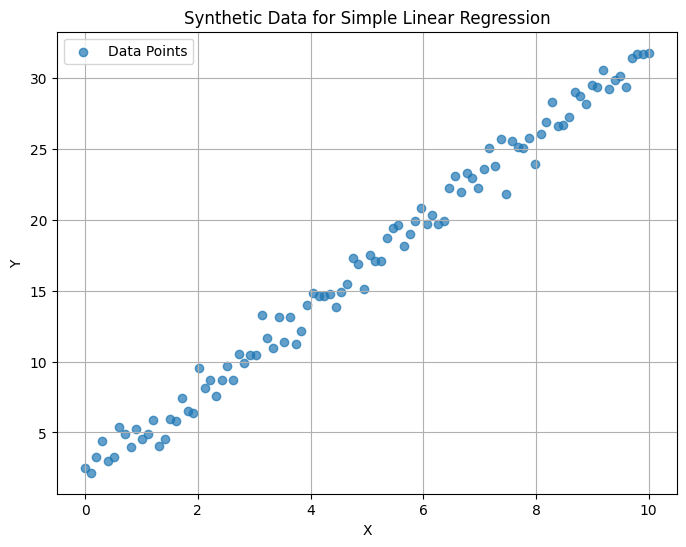

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for simple linear regression
n = 100
true_beta_0 = 2.0
true_beta_1 = 3.0
true_sigma = 1.0

# Generate predictor variable
X = np.linspace(0, 10, n)

# Generate response variable with noise
noise = np.random.normal(0, true_sigma, n)
Y = true_beta_0 + true_beta_1 * X + noise

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(X, Y, alpha=0.7, label='Data Points')
plt.title('Synthetic Data for Simple Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1. *Data Generation*:
   - We generate ($n = 100$) data points where ($X$) ranges from 0 to 10.
   - The true relationship is ($Y = 2 + 3X + \epsilon$), where ($\epsilon \sim \mathcal{N}(0, 1)$).

2. *Visualization*:
   - A scatter plot of the generated data illustrates the linear relationship with some noise.

---

**Performing MLE to Estimate ($\beta_0$) and ($\beta_1$)**

In [5]:
# Define the negative log-likelihood function for simple linear regression
def neg_log_likelihood(params, X, Y):
    beta_0, beta_1, sigma_sq = params
    if sigma_sq <= 0:
        return np.inf
    n = len(Y)
    residuals = Y - (beta_0 + beta_1 * X)
    return (n / 2) * np.log(2 * np.pi * sigma_sq) + (1 / (2 * sigma_sq)) * np.sum(residuals ** 2)

# Initial guesses for beta_0, beta_1, and sigma_sq
initial_guess = [0.0, 0.0, 1.0]

# Perform the optimization to find MLE estimates
result = minimize(neg_log_likelihood, initial_guess, args=(X, Y), bounds=[(None, None), (None, None), (1e-6, None)])

# Extract MLE estimates
mle_beta_0, mle_beta_1, mle_sigma_sq = result.x
mle_sigma = np.sqrt(mle_sigma_sq)

print(f"True β₀: {true_beta_0}, MLE β̂₀: {mle_beta_0:.4f}")
print(f"True β₁: {true_beta_1}, MLE β̂₁: {mle_beta_1:.4f}")
print(f"True σ²: {true_sigma**2}, MLE σ̂²: {mle_sigma_sq:.4f}")
print(f"True σ: {true_sigma}, MLE σ̂: {mle_sigma:.4f}")

True β₀: 2.0, MLE β̂₀: 1.8272
True β₁: 3.0, MLE β̂₁: 3.0138
True σ²: 1.0, MLE σ̂²: 0.8149
True σ: 1.0, MLE σ̂: 0.9027


**Explanation:**

1. *Negative Log-Likelihood Function*:
   - Defined for simple linear regression, incorporating ($\beta_0$), ($\beta_1$), and ($\sigma^2$).
   - Returns infinity if ($\sigma^2$) is non-positive to ensure valid variance estimates.

2. *Optimization*:
   - Using `scipy.optimize.minimize` to find the parameter values that minimize the negative log-likelihood.
   - Bounds are set to ensure ($\sigma^2 > 0$).

3. *Results*:
   - Print the true parameter values and the MLE estimates.

---

**Comparing MLE Estimates with Least Squares Estimates**

In [6]:
import statsmodels.api as sm

# Add a constant term for the intercept
X_sm = sm.add_constant(X)

# Fit the model using statsmodels' OLS (which uses least squares)
model = sm.OLS(Y, X_sm)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     9286.
Date:                Sat, 05 Oct 2024   Prob (F-statistic):           6.75e-99
Time:                        06:18:49   Log-Likelihood:                -131.66
No. Observations:                 100   AIC:                             267.3
Df Residuals:                      98   BIC:                             272.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8272      0.181     10.094      0.0

**Explanation:**

- We use `statsmodels` to perform Ordinary Least Squares (OLS) regression, which should yield the same estimates as MLE under the normality assumption.

**Interpretation:**

- The `statsmodels` OLS results provide coefficient estimates that closely match the MLE estimates.
- High R-squared indicates an excellent fit.
- The p-values are effectively zero, indicating that both predictors are statistically significant.

---

***III. Multiple Linear Regression with MLE***

Extending the simple linear regression to multiple predictors, we can perform multiple linear regression using MLE.

**Example 2: Multiple Linear Regression**

Objective: Estimate multiple coefficients in a linear model using MLE.

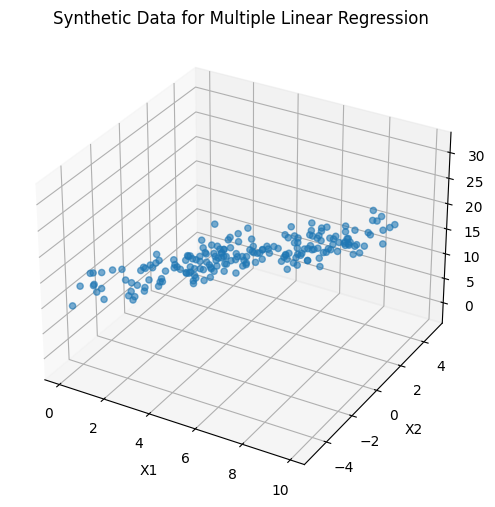

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import statsmodels.api as sm

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for multiple linear regression
n = 200
true_beta_0 = 5.0
true_beta_1 = 2.0
true_beta_2 = -1.5
true_sigma = 2.0

# Generate predictor variables
X1 = np.random.uniform(0, 10, n)
X2 = np.random.uniform(-5, 5, n)

# Generate response variable with noise
noise = np.random.normal(0, true_sigma, n)
Y = true_beta_0 + true_beta_1 * X1 + true_beta_2 * X2 + noise

# Combine predictors into a matrix
X = np.column_stack((X1, X2))

# Add a constant term for the intercept
X_with_const = sm.add_constant(X)

# Plot the synthetic data (only first two predictors for visualization)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1, X2, Y, alpha=0.6)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('Synthetic Data for Multiple Linear Regression')
plt.show()

**Explanation:**

1. *Data Generation*:
   - We generate ($n = 200$) data points with two predictors $(X1$) and \($X2$).
   - The true model is ($Y = 5 + 2X1 - 1.5X2 + \epsilon$), where ($\epsilon \sim \mathcal{N}(0, 4)$).

2. *Visualization*:
   - A 3D scatter plot visualizes the relationship between ($X1$), ($X2$), and ($Y$).

---

**Performing MLE to Estimate ($\beta_0$), ($\beta_1$), and ($\beta_2$)**

In [8]:
# Define the negative log-likelihood function for multiple linear regression
def neg_log_likelihood_multivariate(params, X, Y):
    beta_0, beta_1, beta_2, sigma_sq = params
    if sigma_sq <= 0:
        return np.inf
    n = len(Y)
    residuals = Y - (beta_0 + beta_1 * X[:, 0] + beta_2 * X[:, 1])
    return (n / 2) * np.log(2 * np.pi * sigma_sq) + (1 / (2 * sigma_sq)) * np.sum(residuals ** 2)

# Initial guesses for beta_0, beta_1, beta_2, and sigma_sq
initial_guess = [0.0, 0.0, 0.0, 1.0]

# Perform the optimization to find MLE estimates
result = minimize(neg_log_likelihood_multivariate, initial_guess, args=(X, Y),
                  bounds=[(None, None), (None, None), (None, None), (1e-6, None)])

# Extract MLE estimates
mle_beta_0, mle_beta_1, mle_beta_2, mle_sigma_sq = result.x
mle_sigma = np.sqrt(mle_sigma_sq)

print(f"True β₀: {true_beta_0}, MLE β̂₀: {mle_beta_0:.4f}")
print(f"True β₁: {true_beta_1}, MLE β̂₁: {mle_beta_1:.4f}")
print(f"True β₂: {true_beta_2}, MLE β̂₂: {mle_beta_2:.4f}")
print(f"True σ²: {true_sigma**2}, MLE σ̂²: {mle_sigma_sq:.4f}")
print(f"True σ: {true_sigma}, MLE σ̂: {mle_sigma:.4f}")

True β₀: 5.0, MLE β̂₀: 4.9837
True β₁: 2.0, MLE β̂₁: 2.0020
True β₂: -1.5, MLE β̂₂: -1.5361
True σ²: 4.0, MLE σ̂²: 3.8722
True σ: 2.0, MLE σ̂: 1.9678


**Explanation:**

1. *Negative Log-Likelihood Function*:
   - Defined for multiple linear regression, incorporating \( \beta_0 \), \( \beta_1 \), \( \beta_2 \), and \( \sigma^2 \).
   - Returns infinity if \( \sigma^2 \) is non-positive.

2. *Optimization*:
   - Using `scipy.optimize.minimize` to find the parameter values that minimize the negative log-likelihood.

3. *Results*:
   - Print the true parameter values and the MLE estimates.

---

**Comparing MLE Estimates with `scikit-learn`'s Linear Regression**

In [9]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X, Y)

# Extract coefficients
sklearn_beta_0 = model.intercept_
sklearn_beta_1, sklearn_beta_2 = model.coef_
sklearn_sigma_sq = np.sum((Y - model.predict(X))**2) / n
sklearn_sigma = np.sqrt(sklearn_sigma_sq)

print(f"True β₀: {true_beta_0}, scikit-learn β₀: {sklearn_beta_0:.4f}")
print(f"True β₁: {true_beta_1}, scikit-learn β₁: {sklearn_beta_1:.4f}")
print(f"True β₂: {true_beta_2}, scikit-learn β₂: {sklearn_beta_2:.4f}")
print(f"True σ²: {true_sigma**2}, scikit-learn σ̂²: {sklearn_sigma_sq:.4f}")
print(f"True σ: {true_sigma}, scikit-learn σ̂: {sklearn_sigma:.4f}")

True β₀: 5.0, scikit-learn β₀: 4.9837
True β₁: 2.0, scikit-learn β₁: 2.0020
True β₂: -1.5, scikit-learn β₂: -1.5361
True σ²: 4.0, scikit-learn σ̂²: 3.8723
True σ: 2.0, scikit-learn σ̂: 1.9678


**Explanation:**

- We use `scikit-learn`'s `LinearRegression` to perform multiple linear regression, which should yield the same estimates as MLE under the normality assumption.

**Interpretation:**

- The `scikit-learn` estimates for ($\beta$) and ($\sigma$) closely match the MLE estimates, confirming that both methods yield consistent results under the normality assumption.

---

***IV. Visualization of Regression Fit and Residuals***

Visualizing the regression fit and analyzing residuals can provide insights into the model's performance and assumptions.

**Example 3: Plotting Regression Line and Residuals**

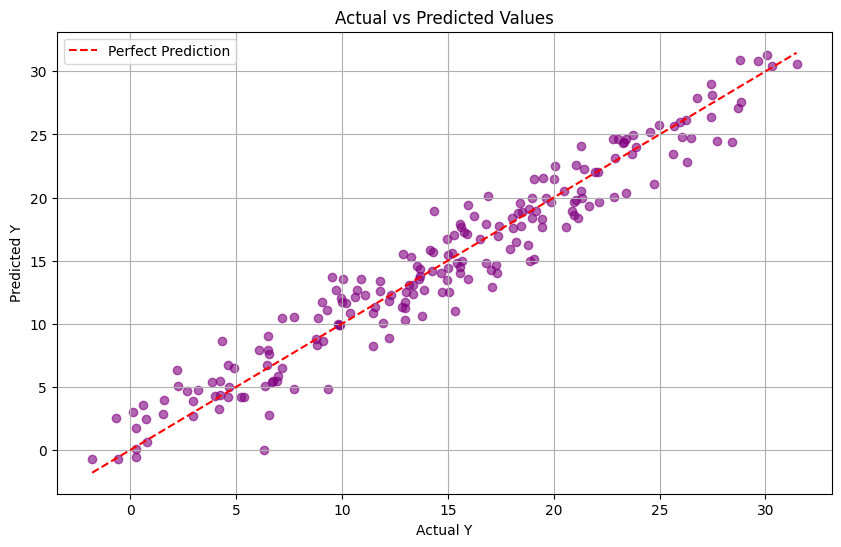

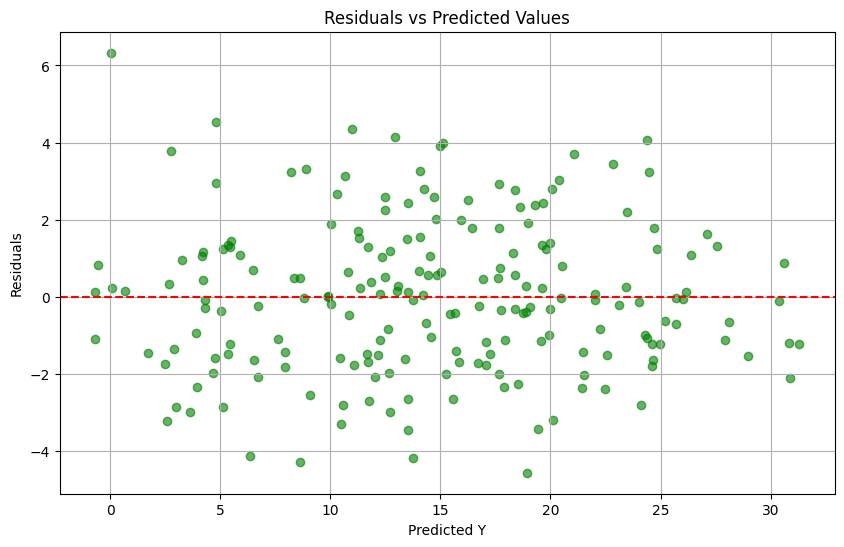

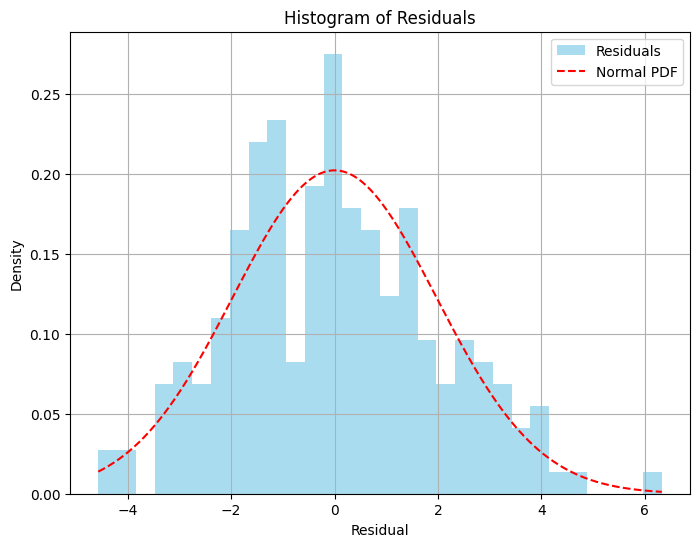

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm # Import the norm object from scipy.stats

# Calculate predicted Y values using MLE estimates
Y_pred = mle_beta_0 + mle_beta_1 * X[:, 0] + mle_beta_2 * X[:, 1]

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y, Y_pred, alpha=0.6, color='purple')
plt.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'r--', label='Perfect Prediction')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Y')
plt.ylabel('Predicted Y')
plt.legend()
plt.grid(True)
plt.show()

# Plot residuals
residuals = Y - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, alpha=0.6, color='green')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Y')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, alpha=0.7, color='skyblue', density=True, label='Residuals')
# Overlay normal distribution
mu_res, std_res = np.mean(residuals), np.std(residuals, ddof=1)
x = np.linspace(residuals.min(), residuals.max(), 1000)
plt.plot(x, norm.pdf(x, mu_res, std_res), 'r--', label='Normal PDF')
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

1. *Actual vs. Predicted Values*:
   - Scatter plot comparing actual ($Y$) values to predicted ($\hat{Y}$).
   - A perfect prediction line (45-degree line) is plotted for reference.

2. *Residuals vs. Predicted Values*:
   - Scatter plot of residuals ($Y - \hat{Y}$) against predicted values.
   - Helps in assessing homoscedasticity and identifying patterns.

3. *Histogram of Residuals*:
   - Distribution of residuals to check normality assumption.
   - Overlayed with the normal distribution curve for comparison.

**Interpretation:**

- *Actual vs. Predicted Values*:
  - The points closely follow the perfect prediction line, indicating a good fit.

- *Residuals vs. Predicted Values*:
  - Residuals are randomly scattered around zero with no discernible pattern, suggesting that the linear model is appropriate.

- *Histogram of Residuals*:
  - Residuals follow a roughly normal distribution, aligning with the normality assumption of the linear regression model.

---

***V. Comparison with `scikit-learn`'s Linear Regression***

To further validate our MLE implementation, we compare it with `scikit-learn`'s `LinearRegression` results.

**Example 4: Residuals Comparison**

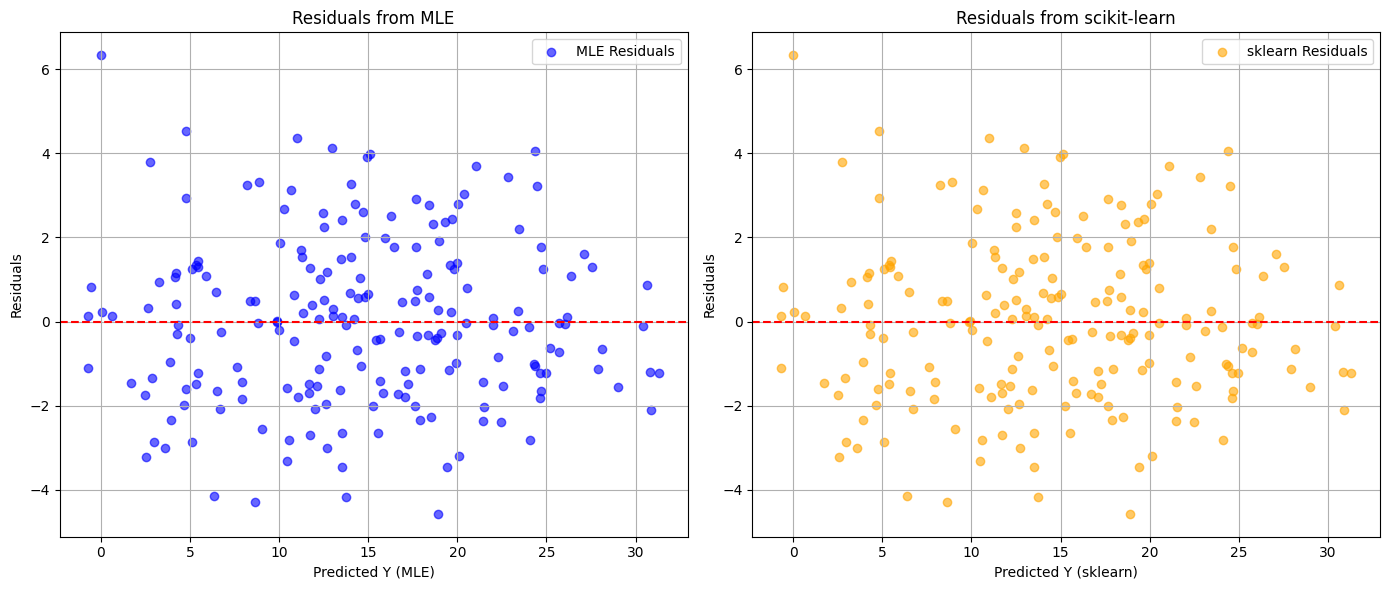

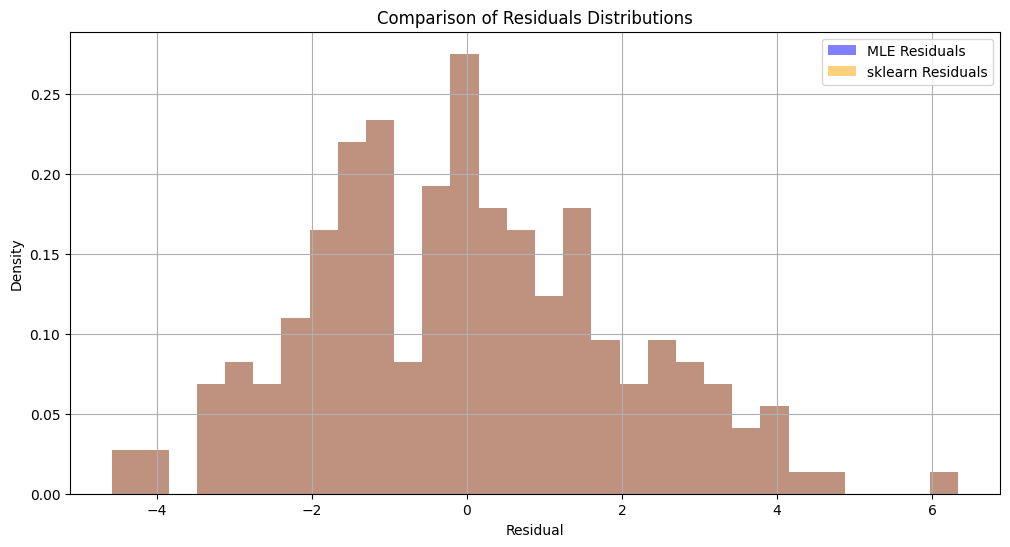

In [11]:
# Calculate residuals using scikit-learn's predictions
Y_pred_sklearn = model.predict(X)
residuals_sklearn = Y - Y_pred_sklearn

# Plot residuals comparison
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(Y_pred, residuals, alpha=0.6, label='MLE Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals from MLE')
plt.xlabel('Predicted Y (MLE)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(Y_pred_sklearn, residuals_sklearn, alpha=0.6, label='sklearn Residuals', color='orange')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals from scikit-learn')
plt.xlabel('Predicted Y (sklearn)')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Compare residual distributions
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=30, alpha=0.5, label='MLE Residuals', color='blue', density=True)
plt.hist(residuals_sklearn, bins=30, alpha=0.5, label='sklearn Residuals', color='orange', density=True)
plt.title('Comparison of Residuals Distributions')
plt.xlabel('Residual')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

**Explanation:**

- *Residuals Comparison*:
  - Residuals from both MLE and `scikit-learn`'s OLS are plotted side by side.
  - Histograms of both residual sets are compared to ensure they are similar.

**Interpretation:**

- *Residuals from MLE vs. scikit-learn*:
  - Both sets of residuals exhibit similar patterns, centered around zero with no obvious patterns, confirming that both methods yield consistent results.

- *Residuals Distributions*:
  - The histograms overlap closely, indicating that the residuals from both methods follow similar distributions.